# Detection des visages

Une fois le visage est détecté, nous nous intéressons à le reconnaître. Dans cette section nous supposons qu’ondispose d’images de visages (c.a.d la phase de détection a été déjà réalisée). L’objectif est de reconnaîtrel’identité de chaque visage. Nous allons explorer des approches classiques et des approches CNN

Pour cette partie voila la liste des site que l'on c'est inspiré pour la réalisation de ce projet:
- [Face Detection CNN](https://www.kaggle.com/code/nurcankurt/face-detection-cnn)
- [Détection de Masque Visage utilisant CNN (98% Précision)](https://www.kaggle.com/code/arbazkhan971/face-mask-detection-using-cnn-98-accuracy)
- [face-mask-detection CNN](https://www.kaggle.com/code/abdalrahmanshahrour/face-mask-detection-cnn/notebook)
- [Face detection using CNN with the LFW dataset](https://www.kaggle.com/code/jake126/face-detection-using-cnn-with-the-lfw-dataset)
- [Image Recognition - Gender Detection](https://www.kaggle.com/code/bmarcos/image-recognition-gender-detection-inceptionv3)
- [Face-Detection-Dataset](https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset?resource=download-directory)

In [7]:
# bibliotheque utiliser pour les expressions regulieres
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob
import cv2

## Programme pour reconnaître un visage (ACP)

Ecrire un programme Python permettant de reconnaitre un visage en utilisant l’ACP


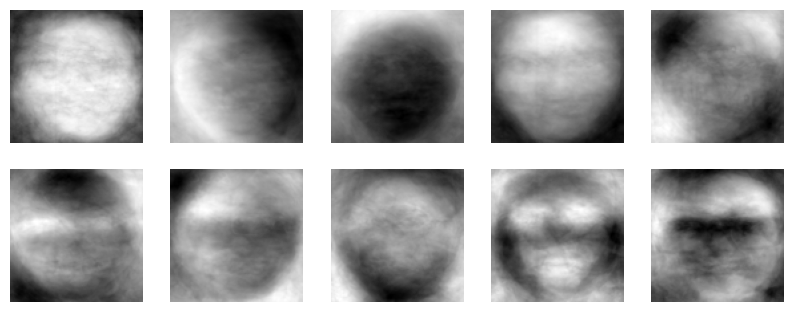

In [31]:
# Étape 1 : Charger les images
def charger_images(chemin):
    images = []
    for fichier in glob.glob(chemin + '/*.jpg'):  # Assurez-vous que le chemin est correct
        img = Image.open(fichier).convert('L')  # Convertir en niveaux de gris
        img = img.resize((100, 100))  # Redimensionner pour uniformiser la taille
        images.append(np.array(img).flatten())  # Aplatir et ajouter à la liste
    return np.array(images)

# Étape 2 à 7 : Prétraitement et ACP
def preparer_et_acp(images):
    scaler = StandardScaler()
    images_normalisees = scaler.fit_transform(images)
    
    pca = PCA(n_components=0.97)  # Conserver 97% de la variance
    composantes_principales = pca.fit_transform(images_normalisees)
    return composantes_principales, pca, scaler

images = charger_images('../visages')
composantes_principales, pca, scaler = preparer_et_acp(images)

# Afficher les visages en 2D
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(100, 100), cmap='gray')
    plt.axis('off')
plt.show()

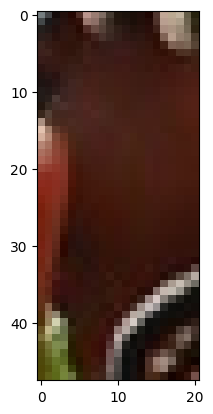

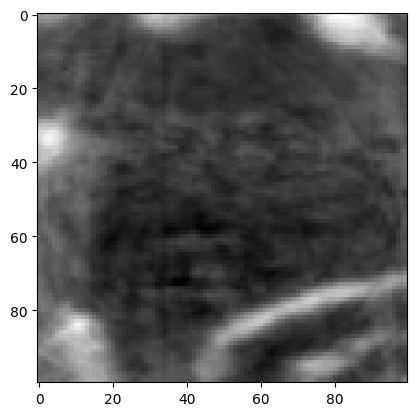

In [36]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread('../visages/00d32f2fe8d05146_face_5.jpg')

# Fonction ajustée pour redimensionner l'image
def preparer_image(image, taille_cible=(100, 100)):
    image_grise = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_redimensionnee = cv2.resize(image_grise, taille_cible, interpolation=cv2.INTER_AREA)
    return image_redimensionnee.flatten().reshape(1, -1)

# Étape 8 : Reconnaissance de visage
def reconnaitre_visage(nouveau_visage, pca, scaler):
    visage_normalise = scaler.transform(nouveau_visage)
    visage_pca = pca.transform(visage_normalise)
    return visage_pca

# Vérifier si l'image a été chargée
if image is not None:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # Préparer l'image
    image_preparee = preparer_image(image)
    
    # Assurez-vous que pca et scaler sont définis correctement ici
    visage_pcaTest = reconnaitre_visage(image_preparee, pca, scaler)
    plt.imshow(pca.inverse_transform(visage_pcaTest).reshape(100, 100), cmap='gray')
    plt.show()

else:
    print("Failed to load the image.")